In [352]:
from pymatgen import MPRester
from pprint import pprint

In [353]:
m = MPRester("wm2QV5blcMKfsIWuBZ")

In [355]:
data = m.query(criteria="**O3", properties=['pretty_formula', 'icsd_ids', 'icsd_id', 'e_above_hull', 'formation_energy_per_atom', 'band_gap', 'nsites', 'full_formula'])

In [358]:
import pandas as pd
full=pd.DataFrame(data)
pprint(full)
#Q1-1

     pretty_formula icsd_ids icsd_id  e_above_hull  formation_energy_per_atom  \
0            CaFeO3       []    None      0.051334                  -2.293058   
1            BaSiO3       []    None      0.562072                  -2.860806   
2            BaGeO3       []    None      0.234014                  -2.480763   
3            CdIrO3       []    None      0.466713                  -0.846333   
4            CaRhO3       []    None      0.269316                  -1.846958   
...             ...      ...     ...           ...                        ...   
2331         ZnCrO3       []    None      0.137663                  -1.849585   
2332         ZnMoO3       []    None      0.083596                  -1.922145   
2333         ZnNiO3       []    None      0.181680                  -0.943148   
2334          ZnWO3       []    None      0.161013                  -1.779081   
2335          ZnWO3       []    None      0.477305                  -1.462790   

      band_gap  nsites full

'Q1-1'

In [359]:
full.describe()
#Q1-2: 2336 compounds.'

,e_above_hull,formation_energy_per_atom,band_gap,nsites
count,2336.000000,2336.000000,2336.000000,2336.000000
mean,0.230641,-2.276728,1.244224,16.746575
std,0.368280,0.876602,1.595942,17.761494
min,0.000000,-4.048479,0.000000,5.000000
25%,0.013483,-2.909511,0.000000,5.000000
50%,0.079189,-2.349287,0.175800,10.000000
75%,0.306340,-1.648835,2.465150,20.000000
max,4.190670,1.980131,5.831800,240.000000


In [360]:
df1=pd.value_counts(full.pretty_formula)
pprint(df1)
#Q1-2: 1308 unique compounds and 2336/1308 = 1.786 crystals/unique compound.

MgSiO3    33
CaCO3     14
CaSiO3    14
LaAlO3    12
VCrO3     11
          ..
TaHO3      1
PrRhO3     1
CaLaO3     1
DySbO3     1
PuPtO3     1
Name: pretty_formula, Length: 1308, dtype: int64


'Q1-2: 1308 unique compounds and 2336/1308 = 1.786 crystals/unique compound.'

In [361]:
df2=pd.value_counts(full.icsd_ids)
pprint(df2)
#Q1-3: 2336-1483=853  853/2336= 36.5% have at least one icsd id.

[]                                                                       1483
[280779, 15882, 290487, 98058, 158898, 158897, 98059, 162204, 158896]       1
[87778]                                                                     1
[200595]                                                                    1
[28931]                                                                     1
                                                                         ... 
[35535]                                                                     1
[34663]                                                                     1
[108896]                                                                    1
[80469, 71010]                                                              1
[182023]                                                                    1
Name: icsd_ids, Length: 854, dtype: int64


In [363]:
full ['formation_energy_per_atom_J/mol']  = full["formation_energy_per_atom"] * 96485
pprint(full)
#Q1-4

     pretty_formula icsd_ids icsd_id  e_above_hull  formation_energy_per_atom  \
0            CaFeO3       []    None      0.051334                  -2.293058   
1            BaSiO3       []    None      0.562072                  -2.860806   
2            BaGeO3       []    None      0.234014                  -2.480763   
3            CdIrO3       []    None      0.466713                  -0.846333   
4            CaRhO3       []    None      0.269316                  -1.846958   
...             ...      ...     ...           ...                        ...   
2331         ZnCrO3       []    None      0.137663                  -1.849585   
2332         ZnMoO3       []    None      0.083596                  -1.922145   
2333         ZnNiO3       []    None      0.181680                  -0.943148   
2334          ZnWO3       []    None      0.161013                  -1.779081   
2335          ZnWO3       []    None      0.477305                  -1.462790   

      band_gap  nsites full

In [364]:
full[(full.e_above_hull > 0.03 ) & (full.band_gap == 0)]

,pretty_formula,icsd_ids,icsd_id,e_above_hull,formation_energy_per_atom,band_gap,nsites,full_formula,formation_energy_per_atom_J/mol
0,CaFeO3,[],None,0.051334,-2.293058,0.0,5,Ca1Fe1O3,-221245.720451
2,BaGeO3,[],None,0.234014,-2.480763,0.0,5,Ba1Ge1O3,-239356.402256
3,CdIrO3,[],None,0.466713,-0.846333,0.0,5,Cd1Ir1O3,-81658.410391
4,CaRhO3,[],None,0.269316,-1.846958,0.0,5,Ca1Rh1O3,-178203.781827
5,CaRuO3,[],None,0.161418,-2.083213,0.0,5,Ca1Ru1O3,-200998.837011
...,...,...,...,...,...,...,...,...,...
2320,YCoO3,[],None,0.136187,-2.530798,0.0,10,Y2Co2O6,-244184.019293
2322,YCoO3,[],None,0.048871,-2.618113,0.0,30,Y6Co6O18,-252608.632636
2326,YWO3,[],None,0.398367,-2.571645,0.0,30,Y6W6O18,-248125.189526
2333,ZnNiO3,[],None,0.181680,-0.943148,0.0,20,Zn4Ni4O12,-90999.586755


In [365]:
full[(full.e_above_hull < 0.03 ) & (full.band_gap == 0)]

,pretty_formula,icsd_ids,icsd_id,e_above_hull,formation_energy_per_atom,band_gap,nsites,full_formula,formation_energy_per_atom_J/mol
28,CaRhO3,[164774],None,0.000000,-2.116275,0.0,10,Ca2Rh2O6,-204188.746121
39,BaPdO3,[],None,0.016742,-1.709389,0.0,5,Ba1Pd1O3,-164930.417854
54,CaRhO3,[164775],None,0.014674,-2.101600,0.0,20,Ca4Rh4O12,-202772.884418
65,AcNiO3,[],None,0.000000,-2.361768,0.0,5,Ac1Ni1O3,-227875.162959
67,AcPdO3,[],None,0.006138,-2.256143,0.0,5,Ac1Pd1O3,-217684.001408
...,...,...,...,...,...,...,...,...,...
2156,YbBO3,"[411805, 160141]",None,0.000000,-2.970454,0.0,10,Yb2B2O6,-286604.294673
2159,TmMnO3,[162202],None,0.000000,-3.117015,0.0,30,Tm6Mn6O18,-300745.150475
2187,YbCoO3,[172051],None,0.000000,-2.238657,0.0,20,Yb4Co4O12,-215996.834997
2195,TiVO3,[],None,0.029340,-2.952417,0.0,20,Ti4V4O12,-284863.978857


In [366]:
full[(full.e_above_hull > 0.03 ) & (full.band_gap > 0) & (full.band_gap <= 1)]

,pretty_formula,icsd_ids,icsd_id,e_above_hull,formation_energy_per_atom,band_gap,nsites,full_formula,formation_energy_per_atom_J/mol
1,BaSiO3,[],None,0.562072,-2.860806,0.9508,5,Ba1Si1O3,-276024.847058
13,CdSiO3,[],None,0.374636,-2.190246,0.6724,5,Cd1Si1O3,-211325.884466
16,CaGeO3,[],None,0.170908,-2.599662,0.5180,5,Ca1Ge1O3,-250828.366192
18,CdGeO3,[],None,0.302213,-1.584966,0.1248,5,Cd1Ge1O3,-152925.462191
27,CeAsO3,[291400],None,0.166701,-2.752816,0.0590,10,Ce2As2O6,-265605.405857
...,...,...,...,...,...,...,...,...,...
2324,YMoO3,[],None,0.150234,-2.828722,0.6668,30,Y6Mo6O18,-272929.250942
2327,YNiO3,[],None,0.067621,-2.311085,0.0597,30,Y6Ni6O18,-222985.042296
2329,ZnBiO3,[],None,0.080219,-1.526924,0.9831,20,Zn4Bi4O12,-147325.229456
2330,ZnSbO3,[],None,0.160821,-1.679304,0.6336,20,Zn4Sb4O12,-162027.643570


In [367]:
full[(full.e_above_hull < 0.03 ) & (full.band_gap > 0) & (full.band_gap <= 1)]

,pretty_formula,icsd_ids,icsd_id,e_above_hull,formation_energy_per_atom,band_gap,nsites,full_formula,formation_energy_per_atom_J/mol
36,CoNiO3,[],None,0.000000,-1.060788,0.8815,10,Co2Ni2O6,-102350.100776
40,BaSnO3,[],None,0.000066,-2.606057,0.6122,10,Ba2Sn2O6,-251445.364032
47,AgAsO3,[],None,0.000000,-1.295780,0.2826,10,Ag2As2O6,-125023.347347
182,CeVO3,"[63521, 99834, 185832, 165721, 162748]",None,0.000000,-3.236627,0.0484,20,Ce4V4O12,-312285.968083
183,BaMnO3,[66822],None,0.006784,-2.477873,0.9004,15,Ba3Mn3O9,-239077.605876
...,...,...,...,...,...,...,...,...,...
2220,TiVO3,[],None,0.004188,-2.977569,0.6082,10,Ti2V2O6,-287290.760555
2262,UTlO3,[],None,0.000000,-2.950861,0.3179,5,U1Tl1O3,-284713.797365
2291,YCuO3,[],None,0.019953,-2.434006,0.0914,20,Y4Cu4O12,-234845.052580
2314,YCuO3,[],None,0.010827,-2.443132,0.0167,30,Y6Cu6O18,-235725.588825


In [368]:
full[(full.e_above_hull > 0.03 ) & (full.band_gap > 1)]

,pretty_formula,icsd_ids,icsd_id,e_above_hull,formation_energy_per_atom,band_gap,nsites,full_formula,formation_energy_per_atom_J/mol
11,CaHfO3,[],None,0.154373,-3.688503,3.6765,5,Ca1Hf1O3,-355885.249608
37,BiCO3,[],None,0.080220,-1.629570,1.5052,20,Bi4C4O12,-157229.106219
41,AlRhO3,[],None,0.038703,-2.243946,1.6691,10,Al2Rh2O6,-216507.160902
43,AlInO3,[],None,0.063207,-2.668660,2.2751,20,Al4In4O12,-257485.654496
45,AgClO3,[],None,0.063109,-0.489359,2.7243,5,Ag1Cl1O3,-47215.755957
...,...,...,...,...,...,...,...,...,...
2323,YCrO3,[],None,0.157604,-3.046107,1.1967,30,Y6Cr6O18,-293903.661739
2325,YVO3,[],None,0.082582,-3.202777,1.0432,30,Y6V6O18,-309019.932179
2328,TiZnO3,[],None,0.103353,-2.734383,2.4888,20,Ti4Zn4O12,-263826.918098
2332,ZnMoO3,[],None,0.083596,-1.922145,1.4896,20,Zn4Mo4O12,-185458.140184


In [369]:
full[(full.e_above_hull < 0.03 ) & (full.band_gap > 1)]

,pretty_formula,icsd_ids,icsd_id,e_above_hull,formation_energy_per_atom,band_gap,nsites,full_formula,formation_energy_per_atom_J/mol
22,BaZrO3,[190881],None,0.001705,-3.657072,3.1195,10,Ba2Zr2O6,-352852.573901
30,CaCO3,[186773],None,0.016154,-2.691029,4.8486,10,Ca2C2O6,-259643.945126
42,AlVO3,[],None,0.026787,-2.965149,1.5227,10,Al2V2O6,-286092.436506
46,AgBrO3,[],None,0.000000,-0.304973,2.3843,5,Ag1Br1O3,-29425.329224
51,AlFeO3,[],None,0.020699,-2.647534,2.2980,10,Al2Fe2O6,-255447.286367
...,...,...,...,...,...,...,...,...,...
2263,YbGeO3,[],None,0.000000,-2.787323,1.0351,5,Yb1Ge1O3,-268934.830734
2277,ZnCO3,[100679],None,0.000000,-1.838493,3.5628,10,Zn2C2O6,-177386.955327
2294,YMoO3,[],None,0.000000,-2.978956,2.7289,20,Y4Mo4O12,-287424.554054
2317,YFeO3,[],None,0.022253,-2.921990,1.3836,10,Y2Fe2O6,-281928.210095


In [372]:
pd.DataFrame([(925, 213, 411),(152, 105, 530)], index=['unstable', 'potentially_stable'], columns=['metallic', 'small_band_gap', 'large_band_gap'])
#Q1-5

,metallic,small_band_gap,large_band_gap
unstable,925,213,411
potentially_stable,152,105,530


Text(0.5, 125, 'Mean=-2.276728')

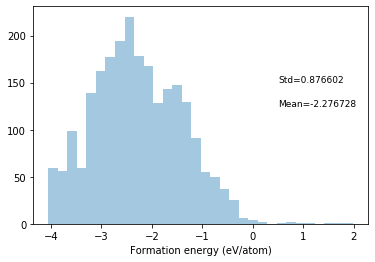

In [377]:
import seaborn as sns
dist1=sns.distplot(full["formation_energy_per_atom"], kde=False, axlabel= "Formation energy (eV/atom)")
dist1.text(0.5,150,"Std=0.876602",fontsize=9)
dist1.text(0.5,125,"Mean=-2.276728", fontsize=9)
#Q1-6a

Text(4, 700, 'Mean=1.244224')

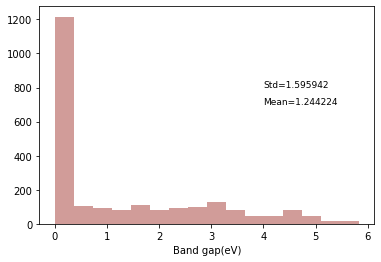

In [376]:
dist2=sns.distplot(full["band_gap"], kde=False, color="r", axlabel= "Band gap(eV)")
dist2.text(4, 800, "Std=1.595942", fontsize=9)
dist2.text(4, 700, "Mean=1.244224", fontsize=9)
#Q1-6b

In [378]:
cdata=pd.read_csv("HighthroughputDFTcalculationsofformationenergystabilityandoxygenvacancyformationenergyofABO3perovskites.csv")
pd.DataFrame(cdata)
#Q2-1

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],a [ang],b [ang],c [ang],alpha [deg],beta [deg],gamma [deg],Vacancy energy [eV/O atom]
0,Ac2O3,Ac,Ac,False,element not in BV,element not in BV,1.12,1.12,cubic,-2.732,...,0.000,20.836,0.332,4.705,4.705,4.705,90.0,90.0,90.0,3.150
1,AcAgO3,Ac,Ag,False,element not in BV,element not in BV,1.12,0.95,orthorhombic,-1.957,...,0.000,14.485,0.000,5.779,6.077,8.248,90.0,90.0,90.0,0.817
2,AcAlO3,Ac,Al,False,element not in BV,element not in BV,1.12,0.54,cubic,-3.532,...,0.000,11.487,4.307,3.858,3.858,3.858,90.0,90.0,90.0,6.695
3,AcAsO3,Ac,As,False,element not in BV,element not in BV,1.12,0.52,orthorhombic,-2.398,...,0.000,14.355,0.000,5.780,6.012,8.262,90.0,90.0,90.0,3.634
4,AcAuO3,Ac,Au,False,element not in BV,element not in BV,1.12,0.93,orthorhombic,-2.006,...,0.000,15.190,0.745,5.899,6.750,7.630,90.0,90.0,90.0,0.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.62,cubic,-1.637,...,0.339,12.200,0.000,3.936,3.936,3.936,90.0,90.0,90.0,0.191
5325,ZrYO3,Zr,Y,False,not balanced,not balanced,0.89,0.90,cubic,-2.126,...,0.200,15.277,0.000,4.243,4.243,4.243,90.0,90.0,90.0,-4.920
5326,ZrYbO3,Zr,Yb,False,not balanced,not balanced,0.89,0.95,orthorhombic,-3.455,...,0.000,13.136,4.007,5.558,5.726,8.254,90.0,90.0,90.0,-6.177
5327,ZrZnO3,Zr,Zn,False,not balanced,not balanced,0.89,0.74,cubic,-1.630,...,0.001,10.804,0.000,3.780,3.780,3.780,90.0,90.0,90.0,-0.762


In [380]:
len(cdata.columns)
#Q2-3 21 columns

21

In [379]:
pd.value_counts(cdata.loc[:, 'Chemical formula'])
#Q2-2 5329 compounds

BiHgO3    1
CsUO3     1
PbAsO3    1
LaScO3    1
GeIrO3    1
         ..
CrSnO3    1
Dy2O3     1
CdCuO3    1
BeSrO3    1
Na2O3     1
Name: Chemical formula, Length: 5329, dtype: int64

In [384]:
b=cdata.loc[:, 'Formation energy [eV/atom]']
pprint(b)

0       -2.732
1       -1.957
2       -3.532
3       -2.398
4       -2.006
         ...  
5324    -1.637
5325    -2.126
5326    -3.455
5327    -1.630
5328    -2.382
Name: Formation energy [eV/atom], Length: 5329, dtype: object


In [385]:
b.count()

5329

In [386]:
cdata.dtypes

Chemical formula               object
A                              object
B                              object
In literature                    bool
Valence A                      object
Valence B                      object
Radius A [ang]                float64
Radius B [ang]                float64
Lowest distortion              object
Formation energy [eV/atom]     object
Stability [eV/atom]            object
Magnetic moment [mu_B]         object
Volume per atom [A^3/atom]     object
Band gap [eV]                  object
a [ang]                        object
b [ang]                        object
c [ang]                        object
alpha [deg]                    object
beta [deg]                     object
gamma [deg]                    object
Vacancy energy [eV/O atom]     object
dtype: object

In [387]:
data_columns = ['Formation energy [eV/atom]']

In [388]:
num_cdata = (cdata.drop(data_columns, axis=1).join(cdata[data_columns].apply(pd.to_numeric, errors='coerce')))

In [389]:
pprint(num_cdata)

     Chemical formula   A   B  In literature          Valence A  \
0               Ac2O3  Ac  Ac          False  element not in BV   
1              AcAgO3  Ac  Ag          False  element not in BV   
2              AcAlO3  Ac  Al          False  element not in BV   
3              AcAsO3  Ac  As          False  element not in BV   
4              AcAuO3  Ac  Au          False  element not in BV   
...               ...  ..  ..            ...                ...   
5324            ZrWO3  Zr   W          False                  1   
5325            ZrYO3  Zr   Y          False       not balanced   
5326           ZrYbO3  Zr  Yb          False       not balanced   
5327           ZrZnO3  Zr  Zn          False       not balanced   
5328            Zr2O3  Zr  Zr          False       not balanced   

              Valence B  Radius A [ang]  Radius B [ang] Lowest distortion  \
0     element not in BV            1.12            1.12             cubic   
1     element not in BV            1.12  

In [391]:
new_num_cdata = num_cdata[num_cdata[data_columns].notnull().all(axis=1)]
new_num_cdata.count()
#Q2-4: 5276 data points remain.

Chemical formula              5276
A                             5276
B                             5276
In literature                 5276
Valence A                     5276
Valence B                     5276
Radius A [ang]                5276
Radius B [ang]                5276
Lowest distortion             5276
Stability [eV/atom]           5276
Magnetic moment [mu_B]        5276
Volume per atom [A^3/atom]    5276
Band gap [eV]                 5276
a [ang]                       5276
b [ang]                       5276
c [ang]                       5276
alpha [deg]                   5276
beta [deg]                    5276
gamma [deg]                   5276
Vacancy energy [eV/O atom]    5276
Formation energy [eV/atom]    5276
dtype: int64

In [393]:
new_num_cdata['Formation energy [eV/atom]'].describe()

count    5276.000000
mean       -1.681050
std         0.981348
min        -3.844000
25%        -2.407250
50%        -1.751500
75%        -1.007500
max         1.879000
Name: Formation energy [eV/atom], dtype: float64

Text(0.8, 250, 'Mean=-1.681\nStd=0.981')

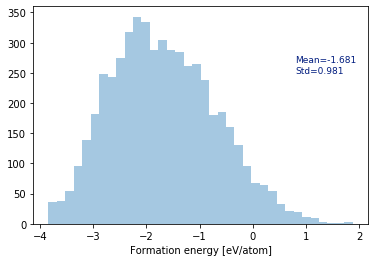

In [396]:
plot=sns.distplot(new_num_cdata['Formation energy [eV/atom]'], kde=False, axlabel='Formation energy [eV/atom]')
plot.text(0.8,250,"Mean=-1.681\nStd=0.981",fontsize=9, color="b")
#Q2-6

In [399]:
mp=full['pretty_formula']
oqmd=cdata['Chemical formula'] 

In [400]:
len(set(mp).intersection(oqmd))
#Q3-1 : 1196 common compounds 

1196

In [2]:
inner["formation_energy_per_atom"].describe()

NameError: name 'inner' is not defined

In [402]:
inner['Formation energy [eV/atom]'].describe()

count    2054.000000
mean       -2.061603
std         0.890355
min        -3.844000
25%        -2.784000
50%        -2.117000
75%        -1.397500
max         1.110000
Name: Formation energy [eV/atom], dtype: float64

Text(0, 110, 'OQMD:\nMean=-2.061\nStd=0.890')

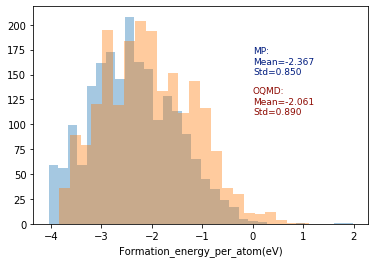

In [404]:
dist_mp=sns.distplot(inner["formation_energy_per_atom"], kde=False, axlabel= "Formation_energy_per_atom(eV)")
dist_opmd=sns.distplot(inner['Formation energy [eV/atom]'], kde=False, axlabel= "Formation_energy_per_atom(eV)")
dist_mp.text(0,150,"MP:\nMean=-2.367\nStd=0.850",fontsize=9, color="b")
dist_opmd.text(0,110,"OQMD:\nMean=-2.061\nStd=0.890", fontsize=9, color="r")
#Q3-2

In [406]:
from scipy import stats
stats.ttest_ind(inner["formation_energy_per_atom"],inner['Formation energy [eV/atom]'])

Ttest_indResult(statistic=-11.253850039097276, pvalue=5.860722411068332e-29)

In [407]:
#The comparison of two dependent data, so paired sample t test is propsed. The alpha is 0.025 for the confidence level of 95%.
stats.ttest_rel(inner["formation_energy_per_atom"],inner['Formation energy [eV/atom]'])

Ttest_relResult(statistic=-29.230056248888154, pvalue=2.4619933674867268e-157)

In [410]:
#Becasue the p value is less than the alpha value, we could conclude that these two formatino energy from different databases are statistically different from one another. 

Object `full` not found.
